In [1]:
%matplotlib notebook
import torch
import torch.nn as nn
import torch.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [18]:
dftrain = pd.read_csv('../train_values.csv')

### Exploratory Data Analysis

Section for analysis and visualisations 

Questions to be answered:
1. Variability of the process w.r.t. Data and Time
2. Covariance w.r.t. parameters in the process
3. Ideas for features engineering in the data


train_values.csv and test_values.csv contain metadata on the cleaning process, phase, and object as well as time series measurements, sampled every 2 seconds. The time series data pertain to the monitoring and control of different cleaning process variables in both supply and return Clean-In-Place lines as well as in cleaning material tanks during the cleaning operations


In [5]:
df.phase.value_counts()

caustic               2299663
final_rinse           1512327
acid                  1326040
pre_rinse              482386
intermediate_rinse     367404
Name: phase, dtype: int64

In [6]:
dfsub = df.copy(deep=True)
dfsub = df[df['process_id']==20001]

#### Let us analyze one process individually

In [7]:
dfsub.loc[:,'timestamp'] = pd.to_datetime(dfsub.timestamp)

In [8]:
dfsub.timestamp.iloc[-1]-dfsub.timestamp.iloc[0]

Timedelta('0 days 00:54:22')

In [9]:
dfsub.columns

Index(['row_id', 'process_id', 'object_id', 'phase', 'timestamp', 'pipeline',
       'supply_flow', 'supply_pressure', 'return_temperature',
       'return_conductivity', 'return_turbidity', 'return_flow', 'supply_pump',
       'supply_pre_rinse', 'supply_caustic', 'return_caustic', 'supply_acid',
       'return_acid', 'supply_clean_water', 'return_recovery_water',
       'return_drain', 'object_low_level', 'tank_level_pre_rinse',
       'tank_level_caustic', 'tank_level_acid', 'tank_level_clean_water',
       'tank_temperature_pre_rinse', 'tank_temperature_caustic',
       'tank_temperature_acid', 'tank_concentration_caustic',
       'tank_concentration_acid', 'tank_lsh_caustic', 'tank_lsh_acid',
       'tank_lsh_clean_water', 'tank_lsh_pre_rinse', 'target_time_period'],
      dtype='object')

In [10]:
dfsub.dtypes

row_id                                 int64
process_id                             int64
object_id                              int64
phase                                 object
timestamp                     datetime64[ns]
pipeline                              object
supply_flow                          float64
supply_pressure                      float64
return_temperature                   float64
return_conductivity                  float64
return_turbidity                     float64
return_flow                          float64
supply_pump                             bool
supply_pre_rinse                        bool
supply_caustic                          bool
return_caustic                          bool
supply_acid                             bool
return_acid                             bool
supply_clean_water                      bool
return_recovery_water                   bool
return_drain                            bool
object_low_level                        bool
tank_level

In [11]:
[range(0,len(dfsub.columns)),dfsub.columns]

[range(0, 36),
 Index(['row_id', 'process_id', 'object_id', 'phase', 'timestamp', 'pipeline',
        'supply_flow', 'supply_pressure', 'return_temperature',
        'return_conductivity', 'return_turbidity', 'return_flow', 'supply_pump',
        'supply_pre_rinse', 'supply_caustic', 'return_caustic', 'supply_acid',
        'return_acid', 'supply_clean_water', 'return_recovery_water',
        'return_drain', 'object_low_level', 'tank_level_pre_rinse',
        'tank_level_caustic', 'tank_level_acid', 'tank_level_clean_water',
        'tank_temperature_pre_rinse', 'tank_temperature_caustic',
        'tank_temperature_acid', 'tank_concentration_caustic',
        'tank_concentration_acid', 'tank_lsh_caustic', 'tank_lsh_acid',
        'tank_lsh_clean_water', 'tank_lsh_pre_rinse', 'target_time_period'],
       dtype='object')]

In [12]:
dfsub.iloc[:,[6,7,8,9,11,10]].columns

Index(['supply_flow', 'supply_pressure', 'return_temperature',
       'return_conductivity', 'return_flow', 'return_turbidity'],
      dtype='object')

### Visualizing 
'supply_flow', 'supply_pressure', 'return_temperature',
       'return_conductivity', 'return_turbidity', 'return_flow'

<IPython.core.display.Javascript object>


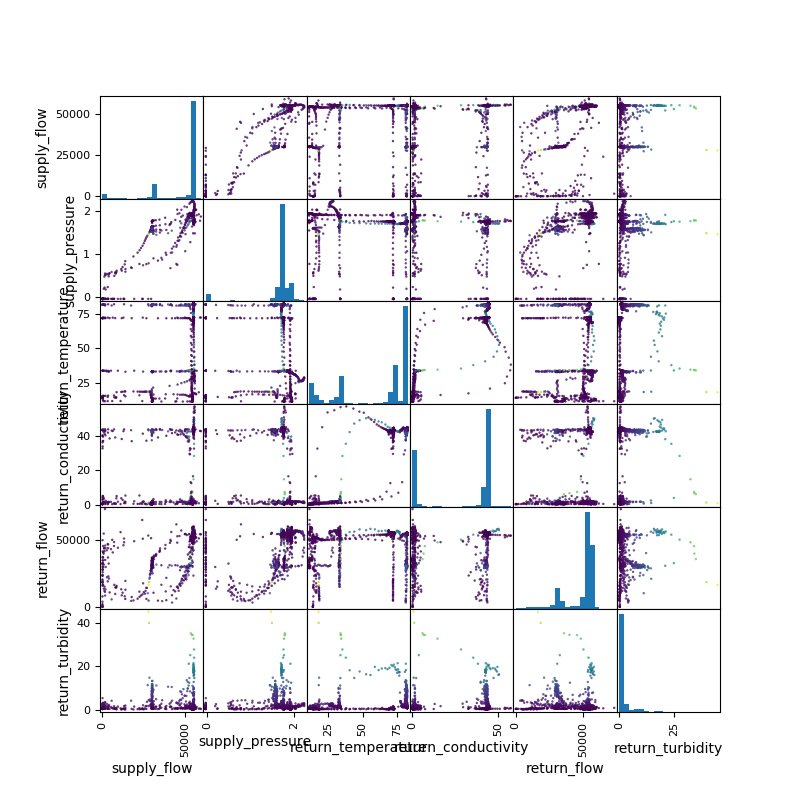

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# iris_dataset = datasets.load_iris()
X = dfsub.iloc[:,[6,7,8,9,11,10]]
feats = X.columns
Y = dfsub.return_turbidity

iris_dataframe = pd.DataFrame(X, columns=feats)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(8, 8), marker='o',
                                 hist_kwds={'bins': 20}, s=3, alpha=.8)

In [ ]:
dfsub.columns[22:26]

<IPython.core.display.Javascript object>


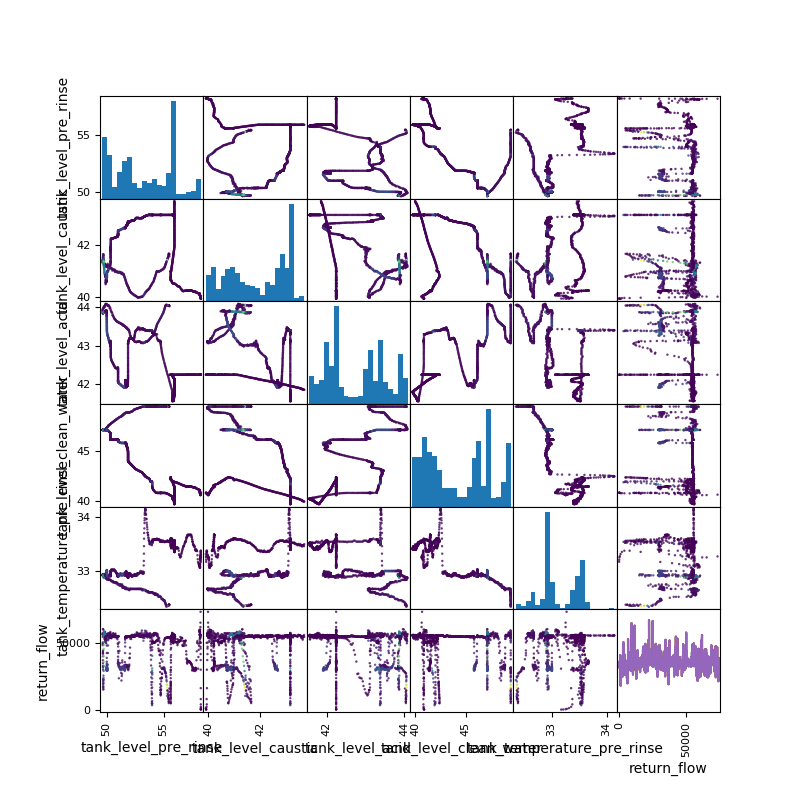

In [14]:
X = dfsub.iloc[:,[22,23,24,25,26,11]] #11 is the prediction variable, y
feats = X.columns
Y = dfsub.return_turbidity

iris_dataframe = pd.DataFrame(X, columns=feats)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(8, 8), marker='o',
                                 hist_kwds={'bins': 20}, s=3, alpha=.8)

### Alternative - Perhaps better plotting method

In [ ]:
contvars=dfsub.dtypes[dfsub.dtypes=='float']

In [ ]:
dfsub[contvars.index]

In [ ]:
g = sns.pairplot(dfsub[contvars.index].iloc[:,[0,1,2,4]],markers='+',diag_kind='kde',size=2)

In [ ]:
dfsub.columns

In [ ]:
dfcont = dfsub[contvars.index]
dfcont['phase'] = dfsub.phase

In [ ]:
dfcont.phase = dfcont.phase .astype('category')

In [ ]:
g = sns.pairplot(dfcont.iloc[:,[0,1,2,4]],markers='+',diag_kind='kde',size=2)

In [ ]:
g = sns.pairplot(dfcont.iloc[:,[3,5,6,4]],markers='+',diag_kind='kde',size=2)

In [ ]:
g = sns.pairplot(dfcont.iloc[:,[7,8,9,4]],markers='+',diag_kind='kde',size=2)

In [ ]:
g = sns.pairplot(dfcont.iloc[:,[10,11,12,4]],markers='+',diag_kind='kde',size=2)

In [ ]:
g = sns.pairplot(dfcont.iloc[:,[13,14,15,4]],markers='+',diag_kind='kde',size=2)

In [ ]:
g = sns.pairplot(dfcont.iloc[:,[16,17,4]],markers='+',size=2)

### Naive Multiple Linear Regression
Let us develop a baseline model for comparison. ')

Throughout the competition the baseline shall serve as the worst case performer, that should be beaten by all other, more advanced, modelling techniques. 

Initially upon checking the handling of all the NA values (there are none) we do the following
1. Convert all categorical values as one-hot-encoded values (1s,0s)
2. Convert PHASE variable to nominal factor varible
3. Merge information w.r.t. conformism to the phase procedures ('check the competition file 'recipe_metadata.csv')

In [ ]:
# From litres/hour to litres/2 seconds
# np.cumsum(dfsub.return_turbidity*dfsub.return_flow/60/60*2)

### Pre-processing to compute target variable

In [15]:
#Function to add temporal features
def compute_temporal_features(df):    
    #select one process only
    sub_tv = df

    # sort data by phase and time stamp
    sub_tv = sub_tv.sort_values(['process_id', 'timestamp'])

    # create lagged time
    sub_tv['timestamp_lagged_process'] = sub_tv.groupby('process_id')['timestamp'].shift()

    #change format to timestamp
    sub_tv['timestamp_lagged_process'] = pd.to_datetime(sub_tv['timestamp_lagged_process'])
    sub_tv['timestamp'] = pd.to_datetime(sub_tv['timestamp'])

    #create new column measuring time sinse last measurement
    sub_tv['sec_process'] = sub_tv['timestamp'] - sub_tv['timestamp_lagged_process']
    sub_tv['sec_process'] = sub_tv['sec_process'].dt.total_seconds()
    sub_tv['sec_process'] = sub_tv['sec_process'].replace(np.nan, 0)

    #set sec into process
    sub_tv['sec_into_process'] = sub_tv.groupby('process_id')['sec_process'].cumsum()

    # sort data by phase and time stamp
    sub_tv = sub_tv.sort_values(['process_id', 'phase', 'timestamp'])

    # create lagged time
    sub_tv['timestamp_lagged_phase'] = sub_tv.groupby(['process_id','phase'])['timestamp'].shift()

    #change formtimestamp_lagged_phasebat to timestamp
    sub_tv['timestamp_lagged_phase'] = pd.to_datetime(sub_tv['timestamp_lagged_phase'])
    sub_tv['timestamp'] = pd.to_datetime(sub_tv['timestamp'])

    #create new column measuring time sinse last measurement
    sub_tv['sec_phase'] = sub_tv['timestamp'] - sub_tv['timestamp_lagged_phase']
    sub_tv['sec_phase'] = sub_tv['sec_phase'].dt.total_seconds()
    sub_tv['sec_phase'] = sub_tv['sec_phase'].replace(np.nan, 0)

    #set sec into phase
    sub_tv['sec_into_phase'] = sub_tv.groupby(['process_id','phase'])['sec_phase'].cumsum()

    return sub_tv.drop(columns=['timestamp_lagged_process', 'sec_process', 'timestamp_lagged_phase', 'sec_phase'])
    

In [58]:
def comp_features(df,train=True):
    # Add zeros initially on level of turbidity, unless it is confirmed
    df['turbidity'] = np.zeros(len(df))

    df['return_flow_non_target'] = df['return_flow']

    df['return_turbidity_non_target'] = df['return_turbidity']

    df.loc[df['target_time_period'] == False, ['return_flow_non_target','return_turbidity_non_target']] = 0

    grp = df.groupby('process_id')

    xx = grp.apply(
             lambda x: x.assign(turbidity = np.cumsum(np.maximum(np.zeros(len(x.return_flow_non_target.values))
                                                                 , x.return_flow_non_target.values) * x.return_turbidity_non_target)))

    # Add zeros initially on level of turbidity, unless it is confirmed
    df['turbidity'] = np.zeros(len(df))

    df['return_flow_non_target'] = df['return_flow']

    df['return_turbidity_non_target'] = df['return_turbidity']

    df.loc[df['target_time_period'] == False, ['return_flow_non_target','return_turbidity_non_target']] = 0

    grp = df.groupby('process_id')

    xx = grp.apply(
             lambda x: x.assign(turbidity = np.cumsum(np.maximum(np.zeros(len(x.return_flow_non_target.values))
                                                                 , x.return_flow_non_target.values) * x.return_turbidity_non_target)))

    dftrain = xx.copy()

    dftrain = dftrain.drop(['process_id','object_id','object_low_level',
                            'target_time_period',
                           'timestamp'], axis=1)

    dfDummies = pd.get_dummies(dftrain[['phase','pipeline']], prefix = 'category')

    dftrain = pd.concat([dftrain,dfDummies],axis=1)

    dftrain = dftrain.drop(['phase','pipeline'],axis=1)


    
#     dftrain = 
    
    if train:
        #Filter columns not present in test dataset
        dftrain = dftrain.drop(['category_L12','category_final_rinse'],axis=1)
        #Double check everything is correct
        assert xx[xx['process_id']==20070].turbidity.iloc[-1] == 454609.2506713713
        return dftrain
    else:
        return [dftrain.turbidity,dftrain.drop(['turbidity'],axis=1)]

In [4]:
# 20058,58417.41697918879
# 20062,589065.7840487395
# 20065,692860.5903703253
# 20066,557125.2766121335
# 20067,10079370.048694493
# 20070,454609.2506713713

In [5]:
xx.index = xx.row_id

In [6]:
#double check computation is true
assert xx[xx['process_id']==20070].turbidity.iloc[-1] == 454609.2506713713

In [7]:
dftrain_raw = xx

## Fitting a simple baseline model

#### Subset relevant variables

In [8]:
dftrain = xx.copy()

dftrain = dftrain.drop(['process_id','object_id','object_low_level','timestamp','target_time_period',
                       'timestamp'], axis=1)

dfDummies = pd.get_dummies(dftrain[['phase','pipeline']], prefix = 'category')

dftrain = pd.concat([dftrain,dfDummies],axis=1)

dftrain = dftrain.drop(['phase','pipeline'],axis=1)

#Filter columns now present in test dataset
dftrain = dftrain.drop(['category_L12','category_final_rinse'],axis=1)

## Using new logic for fitting model

In [30]:
dftrain = comp_features(df)

dftrain2 = compute_temporal_features(df)

dfx=dftrain.merge(dftrain2[['sec_into_process','sec_into_phase','row_id']])

In [32]:
dfx.iloc[0,:].T

row_id                                0
supply_flow                     8550.35
supply_pressure                0.615451
return_temperature              18.0447
return_conductivity             4.99076
return_turbidity               0.177228
return_flow                     15776.9
supply_pump                        True
supply_pre_rinse                   True
supply_caustic                    False
return_caustic                    False
supply_acid                       False
return_acid                       False
supply_clean_water                False
return_recovery_water             False
return_drain                       True
tank_level_pre_rinse            55.4997
tank_level_caustic               41.556
tank_level_acid                 44.0269
tank_level_clean_water          49.4741
tank_temperature_pre_rinse      32.3857
tank_temperature_caustic        83.0367
tank_temperature_acid           73.0324
tank_concentration_caustic      45.3946
tank_concentration_acid         44.3401


In [33]:
dfx['supflow_proc_time'] = dfx.supply_flow*dfx.sec_into_process
dfx['suppres_proc_time'] = dfx.supply_pressure*dfx.sec_into_process
dfx['ret_temp_proc_time'] = dfx.return_temperature*dfx.sec_into_process
dfx['ret_cond_proc_time'] = dfx.return_conductivity*dfx.sec_into_process

dfx['supflow_proc_time_sq'] = dfx.supply_flow*dfx.sec_into_process**2
dfx['suppres_proc_time_sq'] = dfx.supply_pressure*dfx.sec_into_process**2
dfx['ret_temp_proc_time_sq'] = dfx.return_temperature*dfx.sec_into_process**2
dfx['ret_cond_proc_time_sq'] = dfx.return_conductivity*dfx.sec_into_process**2

dfx['supflow_phas_time'] = dfx.supply_flow*dfx.sec_into_phase
dfx['suppres_phas_time'] = dfx.supply_pressure*dfx.sec_into_phase
dfx['ret_temp_phas_time'] = dfx.return_temperature*dfx.sec_into_phase
dfx['ret_cond_phas_time'] = dfx.return_conductivity*dfx.sec_into_phase

dfx['supflow_phas_time_sq'] = dfx.supply_flow*dfx.sec_into_phase**2
dfx['suppres_phas_time_sq'] = dfx.supply_pressure*dfx.sec_into_phase**2
dfx['ret_temp_phas_time_sq'] = dfx.return_temperature*dfx.sec_into_phase**2
dfx['ret_cond_phas_time_sq'] = dfx.return_conductivity*dfx.sec_into_phase**2

dfx['ret_flowturb_target'] = dfx.return_flow*dfx.return_turbidity
dfx['ret_flowturb'] = dfx.return_flow_non_target*dfx.return_turbidity_non_target
dfx['ret_flowturb_sq'] = dfx.return_flow_non_target*dfx.return_turbidity_non_target**2

dfx = dfx.drop(['row_id','return_flow_non_target','return_turbidity_non_target'],axis=1)


KeyError: "['return_flow_non_target' 'return_turbidity_non_target'] not found in axis"

In [66]:
dfx.shape

(5987820, 64)

In [67]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# dftrain = dfx
X_train,y_train = dfx.loc[:,dftrain.columns!= 'turbidity'],dfx.loc[:,dftrain.columns== 'turbidity']

# Create linear regression object
regr = linear_model.ElasticNet()

# Train the model using the training sets
regr.fit(X=X_train, y=y_train)

# Make predictions using the testing set
# diabetes_y_pred = regr.predict(diabetes_X_test)

/home/crab/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
dftest_raw = pd.read_csv('../test_values.csv')

y_test,dftest = comp_features(dftest_raw,train=False)

dftest2 = compute_temporal_features(dftest_raw)

dfx_test=dftest.merge(dftest2[['sec_into_process','sec_into_phase','row_id']])

dfx_test['supflow_proc_time'] = dfx_test.supply_flow*dfx_test.sec_into_process
dfx_test['suppres_proc_time'] = dfx_test.supply_pressure*dfx_test.sec_into_process
dfx_test['ret_temp_proc_time'] = dfx_test.return_temperature*dfx_test.sec_into_process
dfx_test['ret_cond_proc_time'] = dfx_test.return_conductivity*dfx_test.sec_into_process

dfx_test['supflow_proc_time_sq'] = dfx_test.supply_flow*dfx_test.sec_into_process**2
dfx_test['suppres_proc_time_sq'] = dfx_test.supply_pressure*dfx_test.sec_into_process**2
dfx_test['ret_temp_proc_time_sq'] = dfx_test.return_temperature*dfx_test.sec_into_process**2
dfx_test['ret_cond_proc_time_sq'] = dfx_test.return_conductivity*dfx_test.sec_into_process**2

dfx_test['supflow_phas_time'] = dfx_test.supply_flow*dfx_test.sec_into_phase
dfx_test['suppres_phas_time'] = dfx_test.supply_pressure*dfx_test.sec_into_phase
dfx_test['ret_temp_phas_time'] = dfx_test.return_temperature*dfx_test.sec_into_phase
dfx_test['ret_cond_phas_time'] = dfx_test.return_conductivity*dfx_test.sec_into_phase

dfx_test['supflow_phas_time_sq'] = dfx_test.supply_flow*dfx_test.sec_into_phase**2
dfx_test['suppres_phas_time_sq'] = dfx_test.supply_pressure*dfx_test.sec_into_phase**2
dfx_test['ret_temp_phas_time_sq'] = dfx_test.return_temperature*dfx_test.sec_into_phase**2
dfx_test['ret_cond_phas_time_sq'] = dfx_test.return_conductivity*dfx_test.sec_into_phase**2

dfx_test['ret_flowturb_target'] = dfx_test.return_flow*dfx_test.return_turbidity
dfx_test['ret_flowturb'] = dfx_test.return_flow_non_target*dfx_test.return_turbidity_non_target
dfx_test['ret_flowturb_sq'] = dfx_test.return_flow_non_target*dfx_test.return_turbidity_non_target**2

dfx_test = dfx_test.drop(['row_id','return_flow_non_target','return_turbidity_non_target'],axis=1)


# df = dftest
# # Add zeros initially on level of turbidity, unless it is confirmed
# df['turbidity'] = np.zeros(len(df))

# df['return_flow_non_target'] = df['return_flow']

# df['return_turbidity_non_target'] = df['return_turbidity']

# df.loc[df['target_time_period'] == False, ['return_flow_non_target','return_turbidity_non_target']] = 0

# grp = df.groupby('process_id')

# xx = grp.apply(
#          lambda x: x.assign(turbidity = np.cumsum(np.maximum(np.zeros(len(x.return_flow_non_target.values))
#                                                              , x.return_flow_non_target.values) * x.return_turbidity_non_target)))
# y_test = xx['turbidity']

# dftest = xx.copy()

# dftest = dftest.drop(['process_id','object_id','object_low_level'
#                         ,'row_id','timestamp','target_time_period',
#                        'timestamp'], axis=1)

# # dfDummies = pd.get_dummies(dftest[['phase','pipeline']], prefix = 'category')
# dfDummies = pd.get_dummies(dftest[['phase','pipeline']], prefix = 'category')

# dftest = pd.concat([dftest,dfDummies],axis=1)

# dftest = dftest.drop(['phase','pipeline','turbidity'],axis=1)

In [64]:
X_test = dfx_test

In [68]:
X_test.shape,X_train.shape

((1880160, 63), (5987820, 63))

In [69]:
turbidity_y_pred = regr.predict(X_test)

<IPython.core.display.Javascript object>


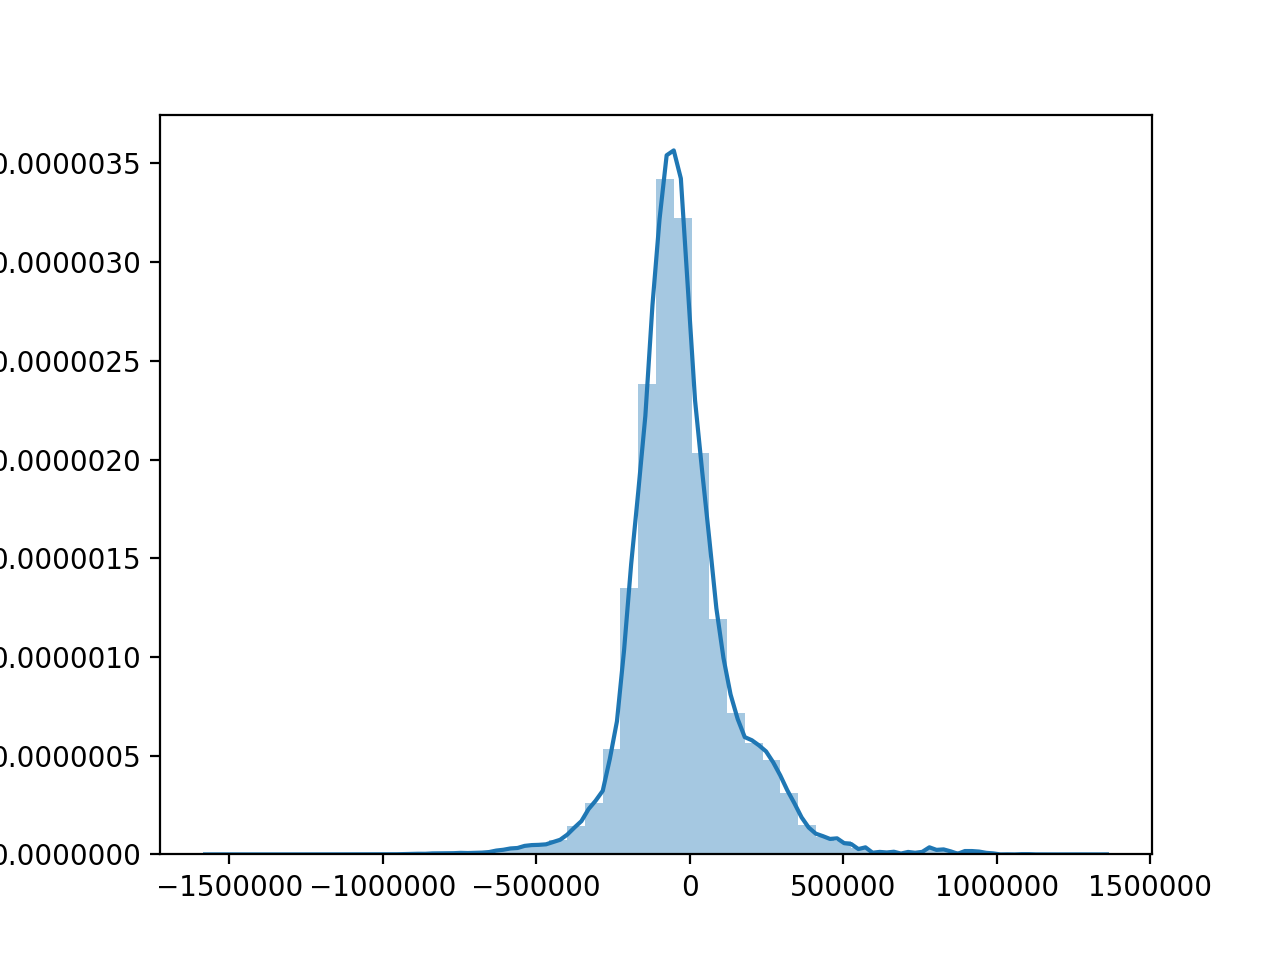

In [18]:
sns.distplot(turbidity_y_pred)

In [70]:
sns.distplot(turbidity_y_pred)

/home/crab/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [77]:
plt.plot(turbidity_y_pred);plt.show()

array([False, False, False, ..., False, False, False])

In [72]:
# Do a non-linear activation on the output (ensure non-negativity)
turbidity_y_pred2 = np.where(turbidity_y_pred > 0, turbidity_y_pred, 0)#turbidity_y_pred * 0.00001) 

In [79]:
turbidity_y_pred2 = np.abs(turbidity_y_pred)

In [80]:
turbidity_y_pred2

array([228699.16841189, 158876.55950623, 188108.68414894, ...,
       152223.26788279, 149965.13798112, 179124.7708903 ])

In [62]:
dftest['final_rinse_total_turbidity_liter'] = turbidity_y_pred2

x_test_agg=dftest.groupby(['process_id']).sum()

# preds = x_test_agg.y_preds

submission_format = pd.read_csv('./Sustainable_Industry_Rinse_Over_Run_-_Submission_Format.csv', index_col=0)

# confirm everything is in the right order
assert np.all(x_test_agg.index == submission_format.index)

my_submission = pd.DataFrame(data=x_test_agg,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission.to_csv('submission.csv')

!head submission.csv

process_id,final_rinse_total_turbidity_liter
20000,57020658.2157989
20006,1258236.350361552
20007,2169296.1119830785
20009,92392715.66582842
20010,3351563.9403867936
20012,2379943.338550831
20013,828138.8280728769
20015,63797143.600244544
20020,4949658.5537067


In [87]:
dftest['final_rinse_total_turbidity_liter'] = turbidity_y_pred2

x_test_agg=dftest.groupby(['process_id']).sum()

# preds = x_test_agg.y_preds

submission_format = pd.read_csv('../submission_format.csv', index_col=0)

# confirm everything is in the right order
assert np.all(x_test_agg.index == submission_format.index)

my_submission = pd.DataFrame(data=x_test_agg,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission.to_csv('../submission2.csv')

!head submission2.csv

process_id,final_rinse_total_turbidity_liter
20000,29987640.660666134
20006,35405623.25956162
20007,27816580.085705277
20009,53822438.53373303
20010,131478242.23640503
20012,52257460.400230445
20013,262851786.87123004
20015,18303536.18858888
20020,73792611.38588443


In [86]:
my_submission.to_csv('test.csv')

# File ready for submission :-)

In [16]:
#What is in train but not in test, what is in test but not in train (should be equivalent)
# np.setdiff1d(X_train.columns,X_test.columns) == np.setdiff1d(X_test.columns,X_train.columns)

array([], dtype=bool)

In [50]:
#From example code
##
# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()